In [21]:
#Challenge 1
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as plt 

employees = pd.read_csv(r'C:\Users\Mtime\OneDrive\Bureau\Employee.csv')
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


##### What's the mean Salary by Department?
method 1

In [6]:
employees.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [12]:
#method 2
employees.pivot_table(index=['Salary'], columns=['Department'],fill_value=0)

Years         
Department    HR IT Sales
Salary                   
30             2  2   0.0
35             4  1   0.0
55             0  0   2.5
60             0  7   0.0
70             8  8   0.0

In [16]:
#Now, group the data by more than one column. Use Pandas pivot table function to selecunstack()t the mean Salary by Department and Title.
employees.pivot_table(index=['Salary'], columns=['Department', 'Title'],fill_value=0)

Years                                       
Department    HR         IT                       Sales
Title         VP analyst VP analyst associate associate
Salary                                                 
30             0       2  0       2         0       0.0
35             0       4  0       1         0       0.0
55             0       0  0       0         0       2.5
60             0       0  0       0         7       0.0
70             8       0  8       0         0       0.0

In [23]:
#For each Department and each job Title, find the Salary median, minimum, maximum and standard deviation. Comment your results.
employees.pivot_table(index=['Years'], columns=['Salary', 'Title'], fill_value = 0, aggfunc=np.sum)

Department                                       Education            \
Salary         30      35        55        60    70            30        35   
Title     analyst analyst associate associate    VP       analyst   analyst   
Years                                                                         
1               0      IT         0         0     0             0  Bachelor   
2            ITHR       0     Sales         0     0  MasterMaster         0   
3               0       0     Sales         0     0             0         0   
4               0      HR         0         0     0             0  Bachelor   
7               0       0         0        IT     0             0         0   
8               0       0         0         0  ITHR             0         0   

                                          Gender                              \
Salary        55        60            70      30      35        55        60   
Title  associate associate            VP analyst analyst associate associate   
Years                                                                          
1              0         0             0       0       M         0         0   
2       Bachelor         0             0      FM       0         F         0   
3         Master         0             0       0       0         M         0   
4              0         0             0       0       F         0         0   
7              0       Phd             0       0       0         0         M   
8              0         0  MasterMaster       0       0         0         0   

                  Name                                         
Salary  70          30      35        55        60         70  
Title   VP     analyst analyst associate associate         VP  
Years                                                          
1        0           0    Jose         0         0          0  
2        0  MariaDavid       0       Eva         0          0  
3        0           0       0    Samuel         0          0  
4        0           0   Sonia         0         0          0  
7        0           0       0         0     Pedro          0  
8       MF           0       0         0         0  CarlosAna

In [34]:
#Find the mean Salary and number of employees in each Department and for each job Title.

df = employees.pivot_table(index=['Salary'], columns=['Department', 'Title'], fill_value = 0, aggfunc=np.mean)
df

Years                                       
Department    HR         IT                       Sales
Title         VP analyst VP analyst associate associate
Salary                                                 
30             0       2  0       2         0       0.0
35             0       4  0       1         0       0.0
55             0       0  0       0         0       2.5
60             0       0  0       0         7       0.0
70             8       0  8       0         0       0.0

In [35]:
#For each Department and each job Title, find the Salary median, minimum, maximum and standard deviation. Comment your results.
df = employees.pivot_table(index=['Salary'], columns=['Department', 'Title'], fill_value = 0, aggfunc=[(np.mean, min, max, np.std)])
df

<function mean at 0x000001DB6B5B6CA0>                               \
                         <built-in function min>                                
                         <built-in function max>                                
            <function std at 0x000001DB6B5B6E50>                                
                                           Years                                
                                             max                                
Department                                    HR                   IT           
Title                                         VP analyst associate VP analyst   
Salary                                                                          
30                                             0       2         0  0       2   
35                                             0       4         0  0       1   
55                                             0       0         0  0       0   
60                                             0       0         0  0       0   
70                                             8       0         0  8       0   

                                                   ...                        \
                                                   ...                         
                                                   ...                         
                                                   ...                         
                                                   ...                         
                                             mean  ...       min std           
Department           Sales                     HR  ...     Sales  HR           
Title      associate    VP analyst associate   VP  ... associate  VP analyst   
Salary                                             ...                         
30                 0     0       0         0    0  ...         0   0       0   
35                 0     0       0         0    0  ...         0   0       0   
55                 0     0       0         3    0  ...         2   0       0   
60                 7     0       0         0    0  ...         0   0       0   
70                 0     0       0         0    8  ...         0   0       0   

                                                                   
                                                                   
                                                                   
                                                                   
                                                                   
                                                                   
Department           IT                   Sales                    
Title      associate VP analyst associate    VP analyst associate  
Salary                                                             
30                 0  0       0         0     0       0  0.000000  
35                 0  0       0         0     0       0  0.000000  
55                 0  0       0         0     0       0  0.707107  
60                 0  0       0         0     0       0  0.000000  
70                 0  0       0         0     0       0  0.000000  

[5 rows x 36 columns]

In [39]:
#Based on your comments, fill the missing values with an appropriate value.
employees.pivot_table(index=['Salary'], columns=['Department', 'Title'], fill_value= 'NaN', aggfunc = [np.mean, min, max, np.std])

mean                                                min            \
           Years                                          Education             
Department    HR           IT                       Sales        HR             
Title         VP analyst   VP analyst associate associate        VP   analyst   
Salary                                                                          
30           NaN     2.0  NaN     2.0       NaN       NaN       NaN    Master   
35           NaN     4.0  NaN     1.0       NaN       NaN       NaN  Bachelor   
55           NaN     NaN  NaN     NaN       NaN       2.5       NaN       NaN   
60           NaN     NaN  NaN     NaN       7.0       NaN       NaN       NaN   
70           8.0     NaN  8.0     NaN       NaN       NaN    Master       NaN   

                              ...     max                                    \
                              ...    Name                     Years           
Department      IT            ...      IT               Sales    HR           
Title           VP   analyst  ... analyst associate associate    VP analyst   
Salary                        ...                                             
30             NaN    Master  ...   Maria       NaN       NaN   NaN     2.0   
35             NaN  Bachelor  ...    Jose       NaN       NaN   NaN     4.0   
55             NaN       NaN  ...     NaN       NaN    Samuel   NaN     NaN   
60             NaN       NaN  ...     NaN     Pedro       NaN   NaN     NaN   
70          Master       NaN  ...     NaN       NaN       NaN   8.0     NaN   

                                                  std  
                                                Years  
Department   IT                       Sales     Sales  
Title        VP analyst associate associate associate  
Salary                                                 
30          NaN     2.0       NaN       NaN       NaN  
35          NaN     1.0       NaN       NaN       NaN  
55          NaN     NaN       NaN       3.0  0.707107  
60          NaN     NaN       7.0       NaN       NaN  
70          8.0     NaN       NaN       NaN       NaN  

[5 rows x 55 columns]

In [47]:
#The stake holders want to know, for each Department, the number of employees and how much money is spent on salaries. Could you provide that information?
employees.pivot_table(index=['Department'], columns=['Salary','Name'], fill_value=0, aggfunc = np.mean)

Years                                             
Salary        30         35        55           60  70       
Name       David Maria Jose Sonia Eva Samuel Pedro Ana Carlos
Department                                                   
HR             2     0    0     4   0      0     0   8      0
IT             0     2    1     0   0      0     7   0      8
Sales          0     0    0     0   2      3     0   0      0

In [68]:
#For each Department and Title, find the the total years of work experience and the mean Salary.
employees.pivot_table(index=['Department','Title'], values = ['Years', 'Salary'], aggfunc = {'Salary': np.mean, 'Years': np.sum})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

In [70]:
#Challenge 2
df = pd.read_excel(r'C:\Users\Mtime\OneDrive\Bureau\Fitbit.xlsx')
df

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


In [75]:
#Explore you dataset in terms of data types and descriptive statistics.
df.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [78]:
df.dtypes

Date                      datetime64[ns]
Calorie burned                     int64
Steps                              int64
Distance                         float64
Floors                             int64
Minutes Sedentary                float64
Minutes Lightly Active             int64
Minutes Fairly Active              int64
Minutes Very Active                int64
Activity Calories                  int64
MinutesOfSleep                     int64
MinutesOfBeingAwake                int64
NumberOfAwakings                   int64
LengthOfRestInMinutes              int64
dtype: object

0.5714518481062608

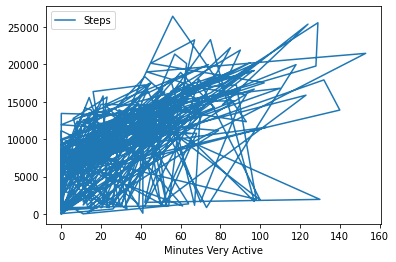

In [82]:
#You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.
df.plot(x='Minutes Very Active', y='Steps')
df['Minutes Very Active'].corr(df['Steps'])

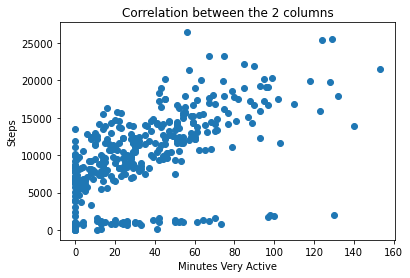

In [85]:
import matplotlib.pyplot as plt;
plt.scatter(df['Minutes Very Active'], df['Steps'])
plt.title('Correlation between the 2 columns' )
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()

In [86]:
#What can you say about Minutes Very Active and Steps? Write a comment below.
#No Correlation between the two Columns


In [87]:
#We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.
df['Minutes Sedentary'].corr(df['Steps'])

0.07690608062990092

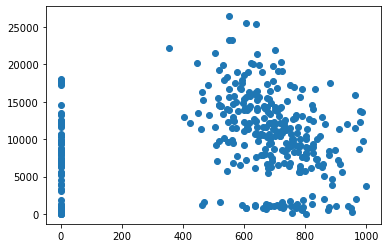

In [88]:
#Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?
plt.scatter(df['Minutes Sedentary'],df['Steps'])

In [89]:
#No corr between the two columns 

In [92]:
#We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.
df['MinutesOfSleep'].corr(df['Steps'])

0.13098565950836386

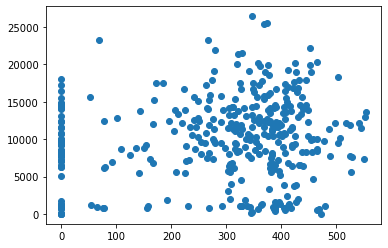

In [93]:
plt.scatter(df['MinutesOfSleep'],df['Steps'])

In [94]:
#No corr

In [101]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']
cor_fit = df.corr().round()
cor_fit

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
Calorie burned,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
Steps,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.0,0.0,0.0,0.0,0.0
Distance,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.0,0.0,0.0,0.0,0.0
Floors,0.0,0.0,0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
Minutes Sedentary,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
Minutes Lightly Active,0.0,0.0,0.0,-0.0,0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
Minutes Fairly Active,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.0,0.0,0.0,0.0,0.0
Minutes Very Active,0.0,1.0,1.0,0.0,0.0,-0.0,0.0,1.0,-0.0,0.0,0.0,0.0,0.0
Activity Calories,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0
MinutesOfSleep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,1.0,1.0,1.0,1.0


In [108]:
#Challenge 3
time_grades = pd.read_excel(r'C:\Users\Mtime\OneDrive\Bureau\Time_Grades.xlsx')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


<AxesSubplot:ylabel='Frequency'>

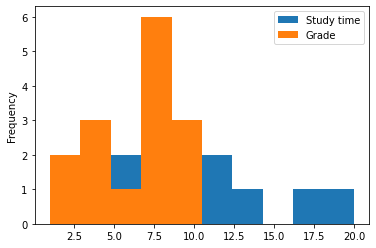

In [107]:
#Show visually the frequency distribution of the time_grades dataset.

time_grades.plot.hist()

In [117]:
#Is there a correlation between Study time and Grade? Use both Pearson and Spearman correlations and comment your results.
time_grades['Study time'].corr(time_grades['Grade'], method = 'pearson')

0.7980456073578857

In [120]:
from scipy.stats import spearmanr

In [122]:
spearmanr(time_grades)

SpearmanrResult(correlation=array([[ 1.        , -0.31277939, -0.28445016],
       [-0.31277939,  1.        ,  0.81965875],
       [-0.28445016,  0.81965875,  1.        ]]), pvalue=array([[0.00000000e+000, 2.56346153e-001, 3.04174482e-001],
       [2.56346153e-001, 3.50898236e-101, 1.83774694e-004],
       [3.04174482e-001, 1.83774694e-004, 0.00000000e+000]]))

In [123]:
#the correlation between the two method is too far

Text(0, 0.5, 'Grade')

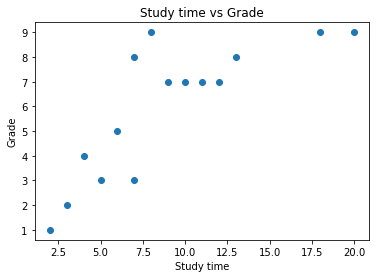

In [134]:
#Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?
plt.scatter(time_grades['Study time'], time_grades['Grade'])
plt.title('Study time vs Grade')
plt.xlabel('Study time')
plt.ylabel('Grade')